In [1]:

import numpy as np
import pandas as pd 
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")
import os



In [2]:
data=pd.read_csv("./train.csv")


In [3]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


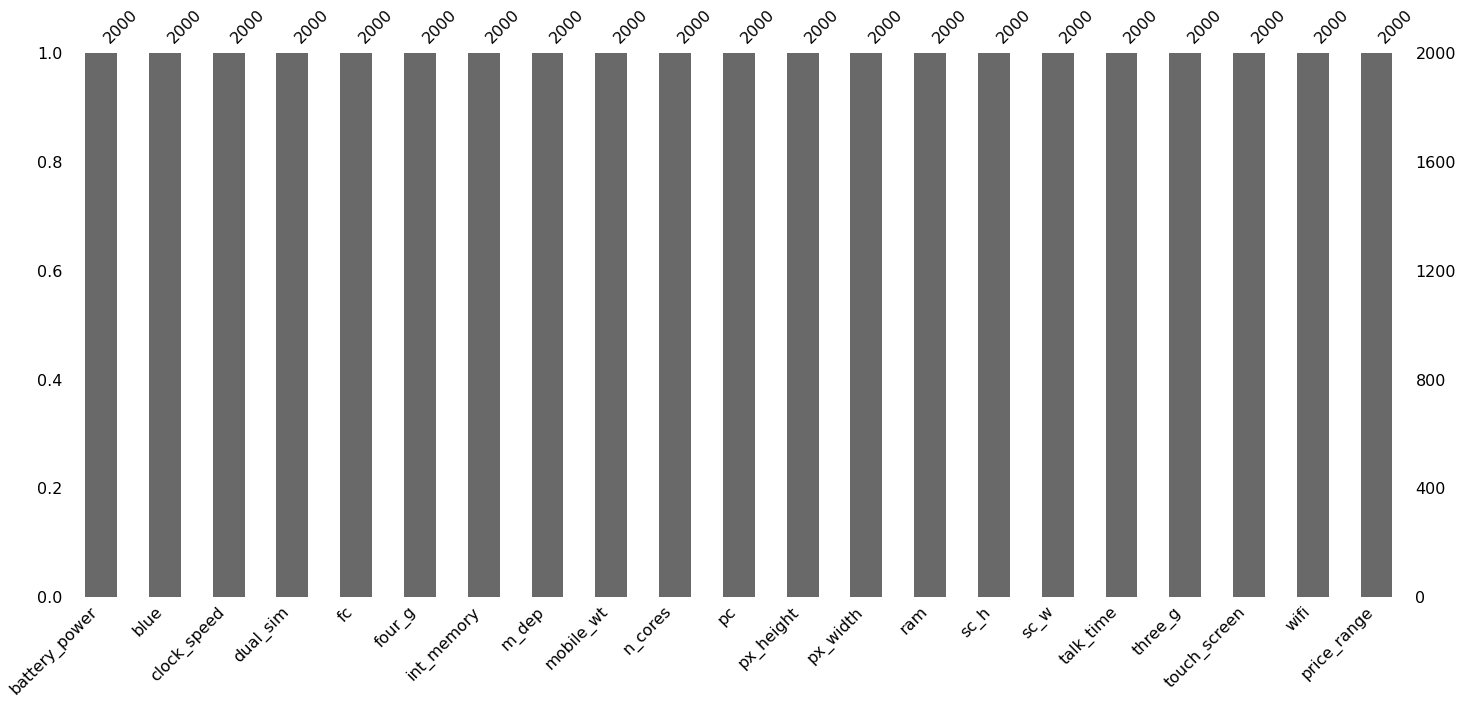

In [4]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(data)
plt.show()

Text(0.5, 1.0, 'Correlation ')

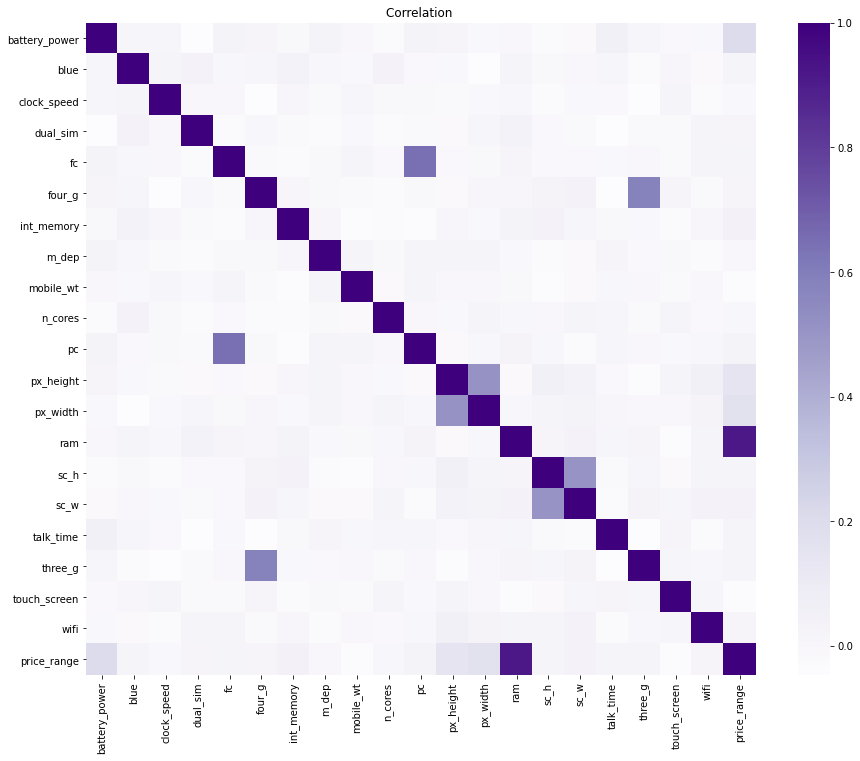

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=data.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Correlation ")

In [6]:
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [7]:
y = data["price_range"].values
x_data=data.drop(["price_range"],axis=1)
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

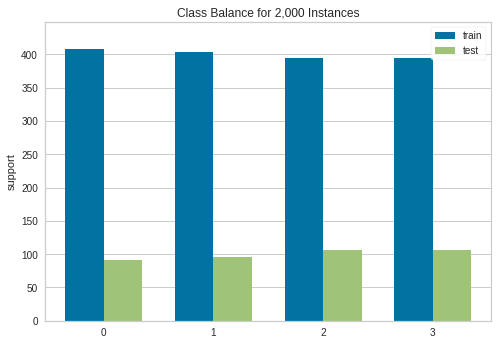

<AxesSubplot:title={'center':'Class Balance for 2,000 Instances'}, ylabel='support'>

In [8]:

from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=[0, 1, 2,3])
visualizer.fit(y_train, y_test)
visualizer.poof()

In [9]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))

train accuracy: 0.97125
test accuracy: 0.8375


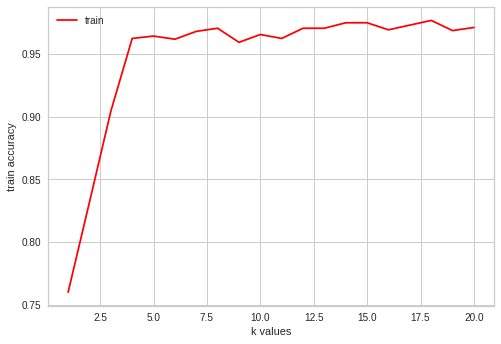

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
accuracy_list_train = []
k=np.arange(1,21,1)
for each in k:
    x_new = SelectKBest(f_classif, k=each).fit_transform(x_train, y_train)
    svm.fit(x_new,y_train)
    accuracy_list_train.append(svm.score(x_new,y_train))   
    
plt.plot(k,accuracy_list_train,color="red",label="train")
plt.xlabel("k values")
plt.ylabel("train accuracy")
plt.legend()
plt.show()

In [11]:
d = {'best features number': k, 'train_score': accuracy_list_train}
df = pd.DataFrame(data=d)
print("max accuracy:",df["train_score"].max())
print("max accuracy id:",df["train_score"].idxmax())

max accuracy: 0.976875
max accuracy id: 17


In [12]:
selector = SelectKBest(f_classif, k = 5)
x_new = selector.fit_transform(x_train, y_train)
x_new_test=selector.fit_transform(x_test,y_test)
names_train = x_train.columns.values[selector.get_support()]
names_test = x_test.columns.values[selector.get_support()]
print("x train features:",names_train)
print("x test features:",names_test)

x train features: ['battery_power' 'int_memory' 'px_height' 'px_width' 'ram']
x test features: ['battery_power' 'int_memory' 'px_height' 'px_width' 'ram']


In [17]:
from sklearn.model_selection import GridSearchCV

C=[1,0.1,0.25,0.5,2,0.75]
kernel=["linear","rbf"]
gamma=["auto",0.01,0.001,0.0001,1]
decision_function_shape=["ovo","ovr"]

In [18]:
svm=SVC(random_state=1)
grid_svm=GridSearchCV(estimator=svm,cv=5,param_grid=dict(kernel=kernel,C=C, gamma=gamma, decision_function_shape=decision_function_shape))
grid_svm.fit(x_new,y_train)
print("best param: ", grid_svm.best_params_)

best param:  {'C': 2, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}


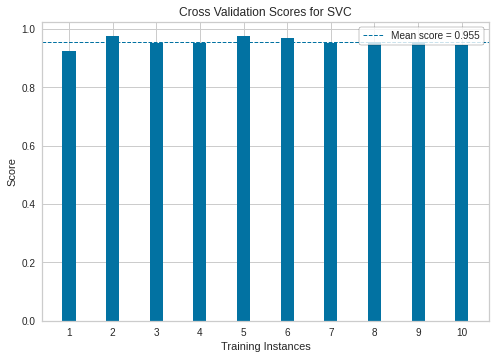

<AxesSubplot:title={'center':'Cross Validation Scores for SVC'}, xlabel='Training Instances', ylabel='Score'>

In [19]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
_, ax = plt.subplots()

cv = StratifiedKFold(10)

oz = CVScores(
    SVC(C=2,decision_function_shape="ovo",gamma="auto",kernel="sigmoid",random_state=1), ax=ax, cv=cv, scoring='accuracy'
)
oz.fit(x_new, y_train)
oz.poof()


In [20]:
svm_model=SVC(C=2,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1)

In [21]:
svm_model.fit(x_new,y_train)


SVC(C=2, decision_function_shape='ovo', gamma='auto', kernel='linear',
    random_state=1)

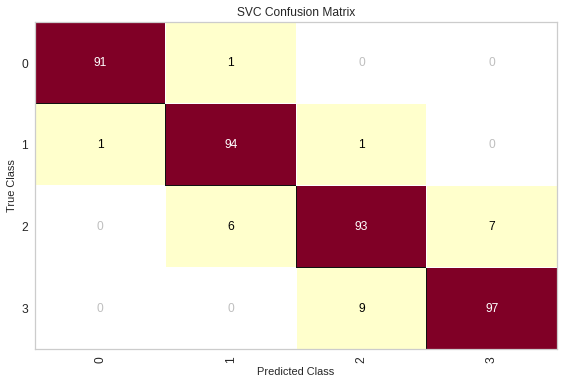

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [22]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(
    svm_model, classes=[0,1,2,3]
)

cm.fit(x_new, y_train)
cm.score(x_new_test, y_test)

cm.poof()

In [23]:
y_pred=svm_model.predict(x_new_test)


In [24]:
svm_test=x_test[["battery_power","int_memory","px_height","px_width","ram"]]


In [25]:
svm_test.head()


,battery_power,int_memory,px_height,px_width,ram
674,0.356045,0.693548,0.092857,0.529372,0.190540
1699,0.334669,0.693548,0.483673,0.338451,0.261358
1282,0.072144,0.129032,0.057653,0.683578,0.440673
1315,0.674015,0.483871,0.491327,0.680908,0.159808
1210,0.203073,0.903226,0.041327,0.696929,0.839391


In [26]:
import csv
import json
import re
import numpy as np
import pandas as pd
import altair as alt

from collections import Counter, OrderedDict



In [27]:
chart=alt.Chart(data).mark_circle(size=20).encode(
    x='ram',
    y='battery_power',
    color='price_range:N',
    tooltip=["price_range", "ram",'battery_power']
).interactive().properties(
    width=400, height=300
)


In [28]:
chart


alt.Chart(...)

In [36]:
#f
bins=[500,800,900,1300,2000]
gName=["low","avg","good","exc"]
data['grade']=pd.cut(data['battery_power'],bins,labels=gName)


In [37]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,grade
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,avg
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,good
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,low
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,low
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,exc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,low
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,exc
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,exc
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,exc


In [38]:
#two
bins=[500,750,950,1500,2000]
gName=["low","avg","good","exc"]
data['grade']=pd.cut(data['battery_power'],bins,labels=gName)
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,grade
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,avg
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,good
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,low
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,low
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,exc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,avg
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,exc
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,exc
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,exc


In [39]:
#three
bins=[500,890,980,1600,2000]
gName=["low","avg","good","exc"]
data['grade']=pd.cut(data['battery_power'],bins,labels=gName)
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,grade
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,low
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,good
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,low
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,low
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,exc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,low
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,exc
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,exc
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,good


In [45]:
for i, j in enumerate(list(data)):
    print(j, len(data[j].unique()))

battery_power 1094
blue 2
clock_speed 26
dual_sim 2
fc 20
four_g 2
int_memory 63
m_dep 10
mobile_wt 121
n_cores 8
pc 21
px_height 1137
px_width 1109
ram 1562
sc_h 15
sc_w 19
talk_time 19
three_g 2
touch_screen 2
wifi 2
price_range 4
grade 4


In [46]:
def categorical(df, a):
    cat_col = []
    for i in df.columns:
        if len(df[i].unique()) <= a:
            cat_col.append(i)
    return(cat_col)

In [47]:
cat_columns = categorical(data, 8)


array([[<AxesSubplot:title={'center':'blue'}>,
        <AxesSubplot:title={'center':'dual_sim'}>,
        <AxesSubplot:title={'center':'four_g'}>],
       [<AxesSubplot:title={'center':'n_cores'}>,
        <AxesSubplot:title={'center':'three_g'}>,
        <AxesSubplot:title={'center':'touch_screen'}>],
       [<AxesSubplot:title={'center':'wifi'}>,
        <AxesSubplot:title={'center':'price_range'}>, <AxesSubplot:>]],
      dtype=object)

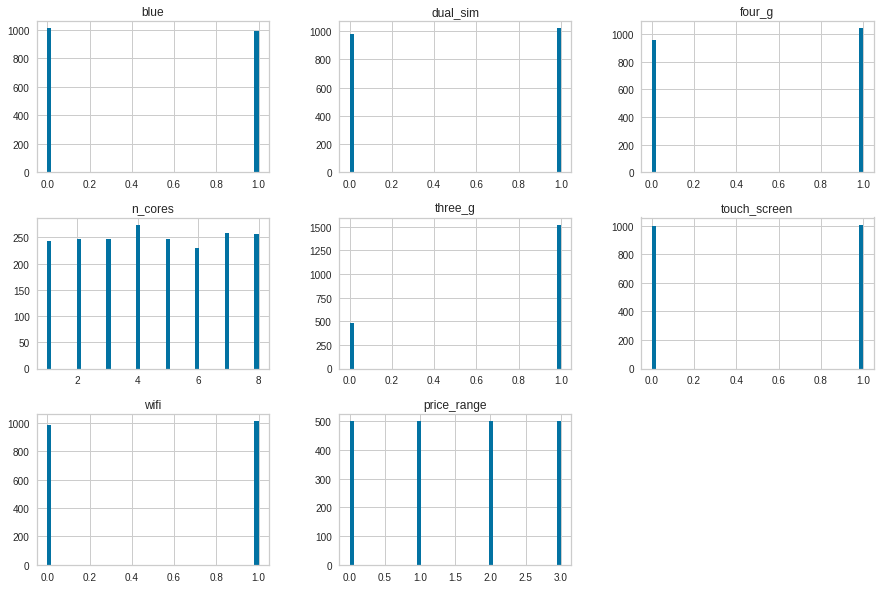

In [48]:
data[cat_columns].hist(figsize=(15,10), bins=50)


<AxesSubplot:>

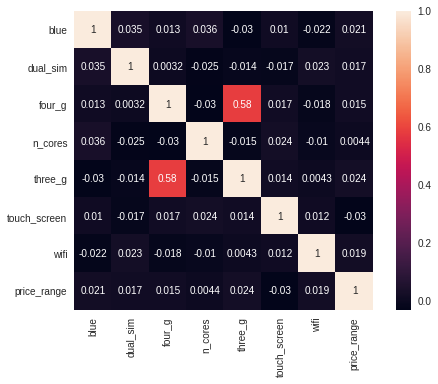

In [50]:
sns.heatmap(data=data[cat_columns].corr(), cbar=True, annot=True, square=True, annot_kws={'size': 10},)

<AxesSubplot:>

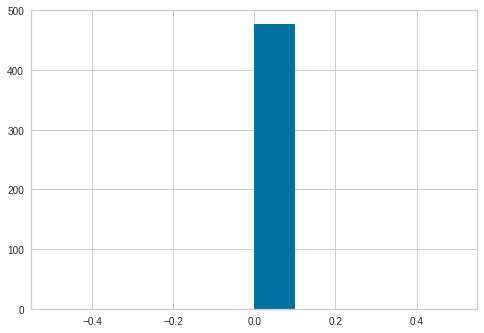

In [51]:
data[data['three_g'] == 0]['four_g'].hist()


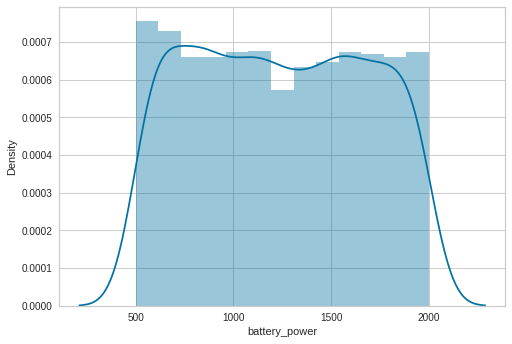

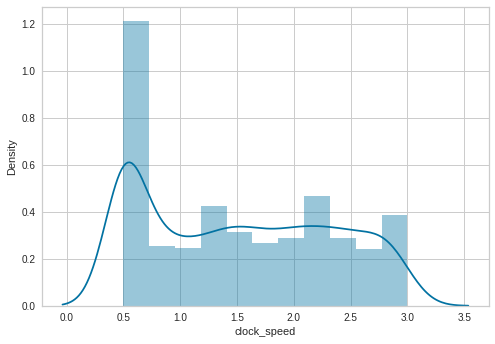

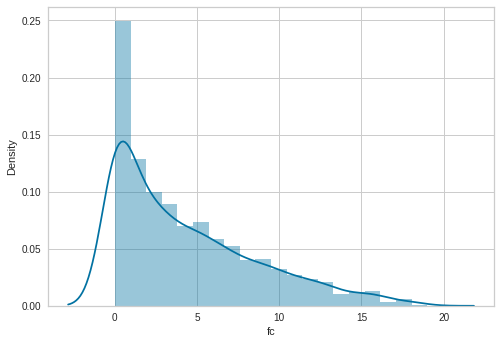

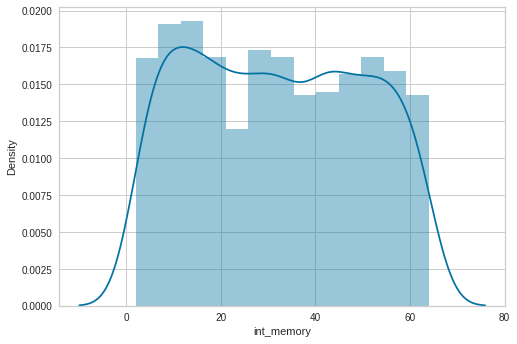

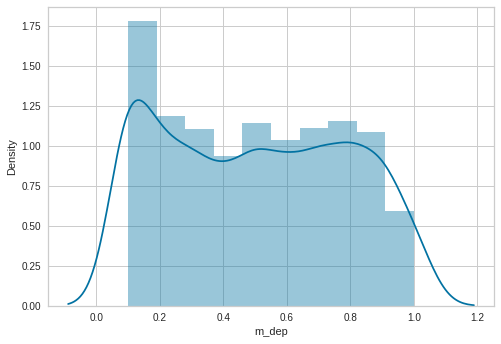

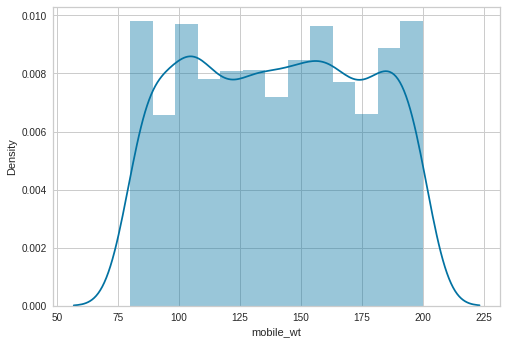

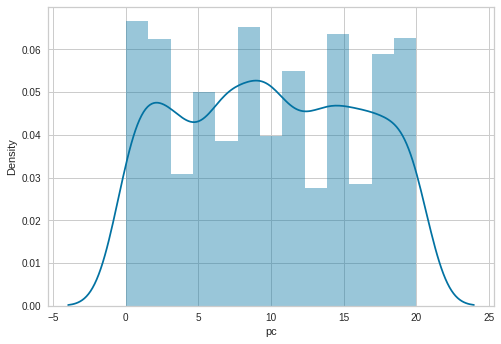

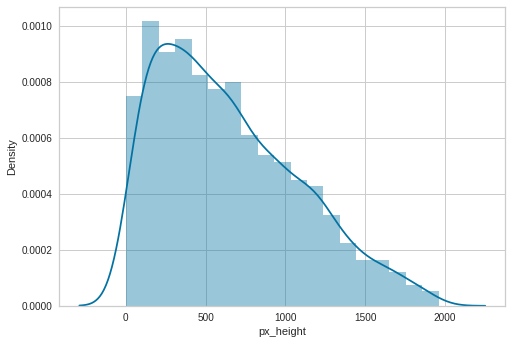

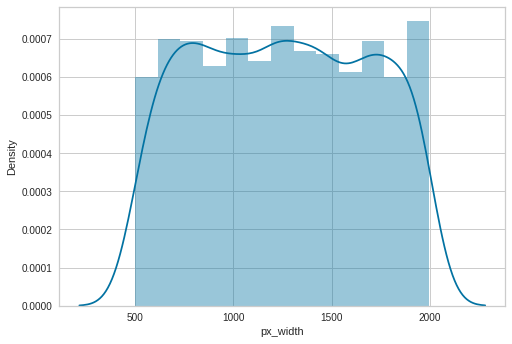

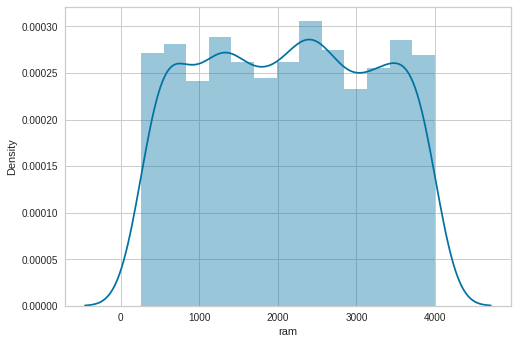

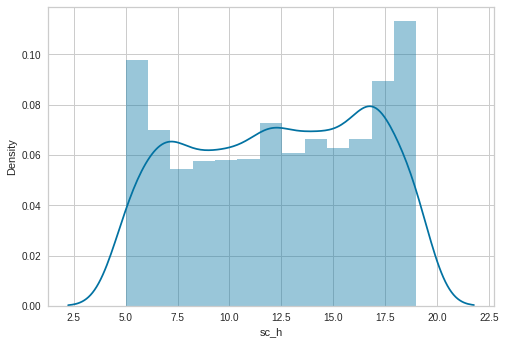

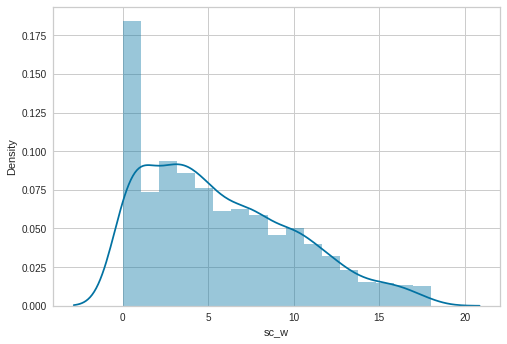

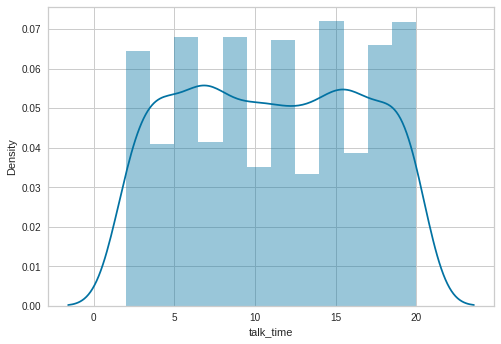

In [52]:
num_columns = [x for x in data.columns if x not in cat_columns]
for i in num_columns:
    sns.distplot(data[i])
    plt.show()

<AxesSubplot:>

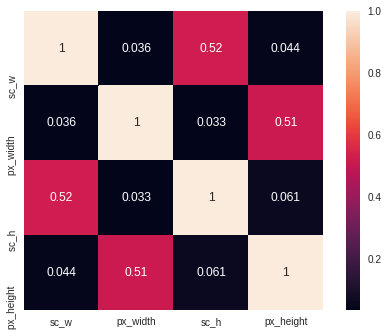

In [53]:
df_size = data[['sc_w', 'px_width', 'sc_h', 'px_height']]
df_size_not_zero = df_size.drop(df_size[(df_size['sc_w'] == 0) | (df_size['px_height'] == 0)].index)
df_size_not_zero.corr()
sns.heatmap(data=df_size_not_zero.corr(), yticklabels=['sc_w           ', 'px_width      ', 'sc_h             ', 'px_height      '],
           cbar=True, annot=True, square=True)

<AxesSubplot:>

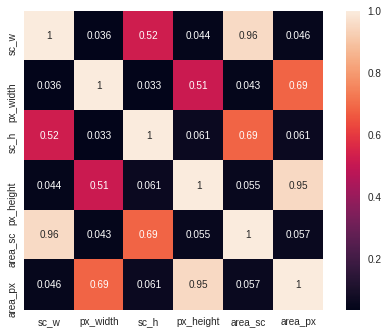

In [54]:
df_size_not_zero['area_sc'] = df_size_not_zero['sc_w'] * df_size_not_zero['sc_h']
df_size_not_zero['area_px'] = df_size_not_zero['px_width'] * df_size_not_zero['px_height']
sns.heatmap(data=df_size_not_zero.corr(), cbar=True, annot=True, square=True, annot_kws={'size': 10},)

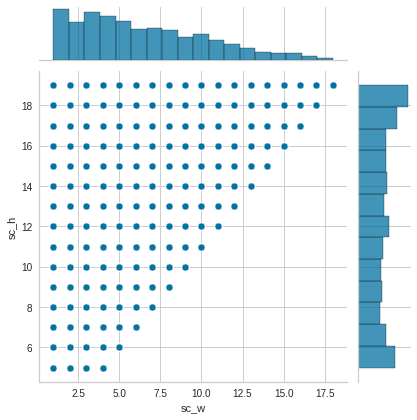

In [55]:
sns.jointplot(x='sc_w' , y='sc_h' , data=df_size_not_zero)


In [57]:
data['sc_w'] = data[~data.apply(lambda x: x.eq(0))]['sc_w']
data['px_height'] = data[~data.apply(lambda x: x.eq(0))]['px_height']
data['sc_w'] = data.groupby('sc_h')['sc_w'].transform(lambda x: x.fillna(x.median()))
data['px_height'] = data.groupby('px_width')['px_height'].transform(lambda x: x.fillna(x.median()))

Text(0.5, 1.0, 'Correlation ')

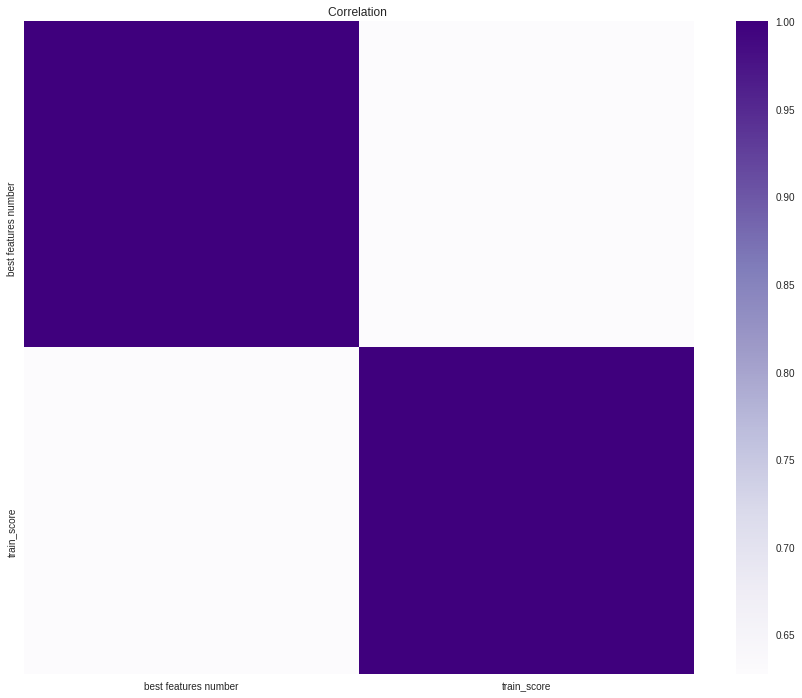

In [58]:
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(df.corr(), cmap='Purples')
r.set_title("Correlation ")

In [59]:
num_top10_corr = data.corr()['price_range'].sort_values(ascending=False).head(10).to_frame()
cm = sns.light_palette("blue", as_cmap=True)
s = num_top10_corr.style.background_gradient(cmap=cm)
s

,price_range
price_range,1.000000
ram,0.917046
battery_power,0.200723
px_width,0.165818
px_height,0.150570
int_memory,0.044435
pc,0.033599
sc_w,0.030581
three_g,0.023611
sc_h,0.022986


<AxesSubplot:xlabel='price_range', ylabel='ram'>

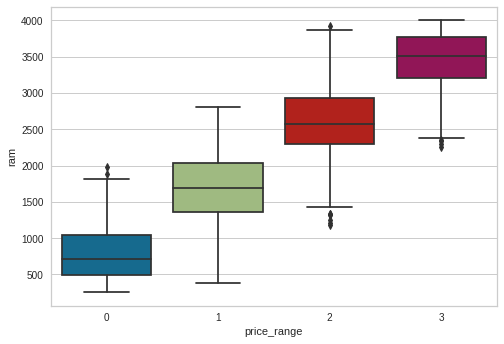

In [60]:
sns.boxplot(x='price_range', y='ram', data=data)


Text(0.5, 0, 'MegaPixels')

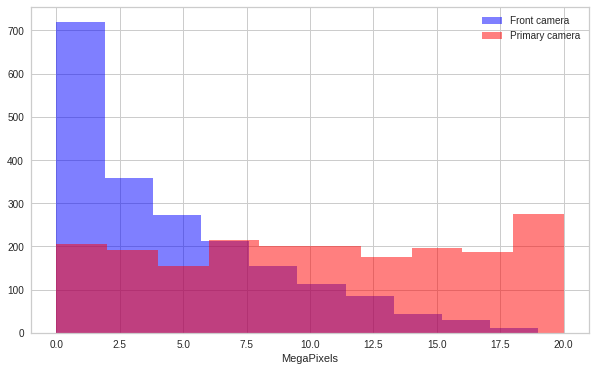

In [62]:
plt.figure(figsize=(10,6))
data['fc'].hist(alpha=0.5, color='blue', label='Front camera')
data['pc'].hist(alpha=0.5, color='red', label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

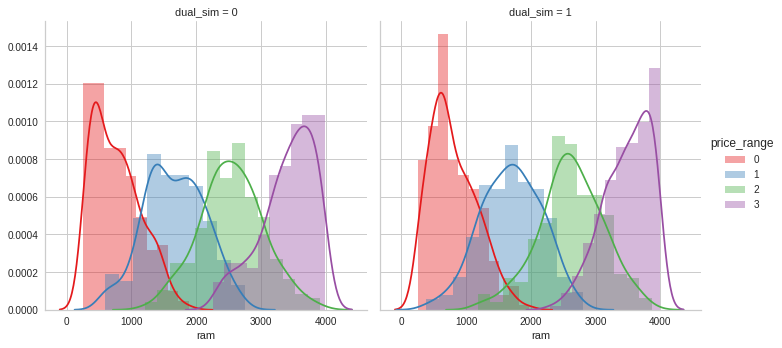

In [63]:
g = sns.FacetGrid(data, col="dual_sim", hue="price_range", palette="Set1", height=5)
g = g.map(sns.distplot, "ram").add_legend()

In [43]:
data.price_range.value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

In [42]:
pd.get_dummies(data.price_range)

,0,1,2,3
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
1995,1,0,0,0
1996,0,0,1,0
1997,0,0,0,1
1998,1,0,0,0


In [66]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,grade
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7.0,19,0,0,1,1,low
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3.0,7,1,1,0,2,good
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2.0,9,1,1,0,2,low
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8.0,11,1,0,0,2,low
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2.0,15,1,1,0,1,exc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4.0,19,1,1,0,0,low
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10.0,16,1,1,1,2,exc
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1.0,5,1,1,0,3,exc
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10.0,19,1,1,1,0,good


In [69]:
data["area"] = data["sc_h"] * data["sc_w"] 
print(data.head())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...   ram  sc_h  sc_w  talk_time  three_g  \
0        188        2  ...  2549     9   7.0         19        0   
1        136        3  ...  2631    17   3.0          7        1   
2        145        5  ...  2603    11   2.0          9        1   
3        131        6  ...  2769    16   8.0         11        1   
4        141        2  ...  1411     8   2.0         15        1   

   touch_screen  wifi  price_range  grade   area  
0             0     1            1    low   63.0  
1       

In [70]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,grade,area
0,842,0,2.2,0,1,0,7,0.6,188,2,...,2549,9,7.0,19,0,0,1,1,low,63.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,2631,17,3.0,7,1,1,0,2,good,51.0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2603,11,2.0,9,1,1,0,2,low,22.0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,2769,16,8.0,11,1,0,0,2,low,128.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1411,8,2.0,15,1,1,0,1,exc,16.0
